- Hacer EDA manual y luego hacer el automatico (comparar)

# **EDA**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

In [37]:
# lectura de los dataframes en la carpeta data y guardarlos en un diccionario con el nombre del archivo como clave

data_path = Path("data")
data_frame = {}

for archivo in data_path.glob("*.xlsx"):
    nombre = archivo.stem # Obtener el nombre del archivo sin la extensión
    data_frame[nombre] = pd.read_excel(archivo, skiprows=9)


In [38]:
#muestra los nombres de los dataframes cargados
print(data_frame.keys())

dict_keys(['EA_PROGRAMACION_ACADEMIC_BASIC-18397456', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397462', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397508', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397514', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397517', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397525', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397529', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397540', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397646'])


In [39]:
print(data_frame["EA_PROGRAMACION_ACADEMIC_BASIC-18397462"].shape)

(7969, 52)


In [40]:
# muestra el tamaño de cada dataframe

filas = []

for archivo, df in data_frame.items():
    print(f"Archivo: {archivo}")
    print(df.shape)
    filas.append(df.shape[0])

print(f"número de filas de cada dataframes{filas}")
print(f"número de filas de todos los dataframes juntos: {sum(filas)}")

Archivo: EA_PROGRAMACION_ACADEMIC_BASIC-18397456
(7726, 52)
Archivo: EA_PROGRAMACION_ACADEMIC_BASIC-18397462
(7969, 52)
Archivo: EA_PROGRAMACION_ACADEMIC_BASIC-18397508
(7155, 52)
Archivo: EA_PROGRAMACION_ACADEMIC_BASIC-18397514
(5663, 52)
Archivo: EA_PROGRAMACION_ACADEMIC_BASIC-18397517
(5541, 52)
Archivo: EA_PROGRAMACION_ACADEMIC_BASIC-18397525
(6802, 52)
Archivo: EA_PROGRAMACION_ACADEMIC_BASIC-18397529
(5188, 52)
Archivo: EA_PROGRAMACION_ACADEMIC_BASIC-18397540
(5345, 52)
Archivo: EA_PROGRAMACION_ACADEMIC_BASIC-18397646
(4862, 52)
número de filas de cada dataframes[7726, 7969, 7155, 5663, 5541, 6802, 5188, 5345, 4862]
número de filas de todos los dataframes juntos: 56251


In [41]:
# concatendar todos los datafremes en uno solo
prog_acad = pd.concat(data_frame.values(), ignore_index = True)
#validar el tamaño que concuerde con la suma de la celda anterior
print(prog_acad.shape)

(56251, 52)


In [42]:
# exploramos el dataframe de la programación académica de los ultimos 9 semestres

pd.set_option("display.max_columns" ,None)
prog_acad.head(5)

,Institución,Grado,Ciclo,Código Catalogo,ID Curso,Nombre Catálogo,Código de la sesión,Sección,Nombre de la sesión,Número de Clase,Clase Asociada,Ubicación,Calendario Festivos,Modo Enseñanza,Modo Enseñanza Descr,Fec_Ini_Real_Clase,Fec_Fin_Real_Clase,Fecha_Ini_Mod_Reunión,Fecha_Fin_Mod_Reunión,Hora Inicio,Hora Fin,Días,Aula Asignada,Capacidad,Tipo Instalación,Código del Departamento,Docentes,Email Docente,Nom Estado Clase,Horas por semana,Metodología,Metodología descripción,Total Hrs Curso,Tipo de curso,Componente,Idioma,Rol Profesor,Acceso,Tipo Asignación,Tipo Clase,Componente Calificado,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Tot Inscr,Estado Clase,Campus,Horas Programadas,Org Acad,Grupo Académico,Estado Inscripción,Prior
0,EAFIT - Universidad EAFIT,PREG,2661,CS0092,109867,Fotografía,ORD,5,Sesión Curso Ordinaria,7600,1,POBLADO,PREG,P,Presencial,2026-01-21,2026-05-13,2026-01-19,2026-05-16,06:00:00,09:00:00,Miercoles,NaN,0,NaN,CS,NaN,NaN,Detener Inscripción,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,Profesor Titular,Aprobar,Docencia normal,Sección Inscripción,Clase,20,20,20,0,S,MEDEL,48.0,SP,Escuela de Artes y Humanidades,Correcto,1
1,EAFIT - Universidad EAFIT,PREG,2661,CS0092,109867,Fotografía,ORD,6,Sesión Curso Ordinaria,7602,1,POBLADO,PREG,P,Presencial,2026-01-21,2026-05-13,2026-01-19,2026-05-16,15:00:00,18:00:00,Miercoles,Poblado Bloque 29 Aula 205,25,Aula normal,CS,1000137468-CC-1128275920-DAVID CORREA FRANCO-P...,dcorreaf@eafit.edu.co,Activo,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,Profesor Titular,Aprobar,Docencia normal,Sección Inscripción,Clase,0,20,9,9,A,MEDEL,48.0,SP,Escuela de Artes y Humanidades,Correcto,2
2,EAFIT - Universidad EAFIT,PREG,2661,CS0240,109937,Teo. de Func. y Efectos Comun.,ORD,2,Sesión Curso Ordinaria,1857,1,POBLADO,PREG,P,Presencial,2026-01-19,2026-05-16,NaT,NaT,NaN,NaN,NaN,NaN,0,NaN,CS,NaN,NaN,Sección Cancelada,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,25,30,25,0,X,MEDEL,0.0,SP,Escuela de Artes y Humanidades,NaN,1
3,EAFIT - Universidad EAFIT,PREG,2661,LE0001,134275,Prueba de Lectura 1,ORD,1,Sesión Curso Ordinaria,7543,1,POBLADO,PREG,P,Presencial,2026-02-14,2026-02-14,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Poblado Bloque 18 Computo 315,30,Sala De Computo,LE,NaN,NaN,Detener Inscripción,DEFECTO,R,Magistral Reforma,2,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,27,30,27,0,S,MEDEL,2.0,LE,Escuela de Artes y Humanidades,Correcto,5
4,EAFIT - Universidad EAFIT,PREG,2661,LE0001,134275,Prueba de Lectura 1,ORD,2,Sesión Curso Ordinaria,7544,1,POBLADO,PREG,P,Presencial,2026-02-14,2026-02-14,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Poblado Bloque 20 Computo 413,50,Sala De Computo- Lab Procesami,LE,NaN,NaN,Activo,DEFECTO,R,Magistral Reforma,2,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,0,30,40,40,A,MEDEL,2.0,LE,Escuela de Artes y Humanidades,Correcto,1


In [43]:
#se revisa la columna "Nom Estado Clase" para revisar qué estados existen. Se pretende eliminar 'Sección Cancelada' y 'Sección Provisional'
# ya que son estados que se dan a las clases que no se usarán en el semestre.
prog_acad["Nom Estado Clase"].unique()

array(['Detener Inscripción', 'Activo', 'Sección Cancelada',
       'Sección Provisional'], dtype=object)

In [47]:
prog_acad[prog_acad["Nom Estado Clase"]=="Sección Provisional"]

,Institución,Grado,Ciclo,Código Catalogo,ID Curso,Nombre Catálogo,Código de la sesión,Sección,Nombre de la sesión,Número de Clase,Clase Asociada,Ubicación,Calendario Festivos,Modo Enseñanza,Modo Enseñanza Descr,Fec_Ini_Real_Clase,Fec_Fin_Real_Clase,Fecha_Ini_Mod_Reunión,Fecha_Fin_Mod_Reunión,Hora Inicio,Hora Fin,Días,Aula Asignada,Capacidad,Tipo Instalación,Código del Departamento,Docentes,Email Docente,Nom Estado Clase,Horas por semana,Metodología,Metodología descripción,Total Hrs Curso,Tipo de curso,Componente,Idioma,Rol Profesor,Acceso,Tipo Asignación,Tipo Clase,Componente Calificado,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Tot Inscr,Estado Clase,Campus,Horas Programadas,Org Acad,Grupo Académico,Estado Inscripción,Prior
52140,EAFIT - Universidad EAFIT,PREG,2261,HL0229,115351,Curso Proyecto - 1 Crédito,ORD,3,Sesión Curso Ordinaria,5946,3,POBLADO,COL,P,Presencial,2022-03-19,2022-05-28,2022-03-19,2022-03-19,12:00:00,14:00:00,Sábado,NaN,0,NaN,HL,1000041394-CC-1128419004-SARA MELISSA GALLEGO ...,smgallegoq@eafit.edu.co,Sección Provisional,DEFECTO,Q,Proyecto,16,ABIERTO,Clase,ESPANOL,Profesor Titular,Aprobar,No Incluido en Carga Trabajo,Sección Inscripción,Clase,9,10,10,1,T,MEDEL,2.0,230127,Escuela de Artes y Humanidades,NaN,0
52141,EAFIT - Universidad EAFIT,PREG,2261,HL0229,115351,Curso Proyecto - 1 Crédito,ORD,3,Sesión Curso Ordinaria,5946,3,POBLADO,COL,P,Presencial,2022-03-19,2022-05-28,2022-05-28,2022-05-28,18:00:00,20:00:00,Sábado,NaN,0,NaN,HL,1000041394-CC-1128419004-SARA MELISSA GALLEGO ...,smgallegoq@eafit.edu.co,Sección Provisional,DEFECTO,Q,Proyecto,16,ABIERTO,Clase,ESPANOL,Profesor Titular,Aprobar,No Incluido en Carga Trabajo,Sección Inscripción,Clase,9,10,10,1,T,MEDEL,2.0,230127,Escuela de Artes y Humanidades,NaN,0


Estados de clases: 
<ul>
    <li>Activo: Clases activas en el semestre.</li>
    <li>Detener Inscripción: Clases que estuvieron activas, y en algun momento se les detuvo la inscripción para que no se matricularan mas estudiantes en ella.</li>
    <li>Sección Cancelada: Clases que se determinaron que no se usarán. Estas siempre están con cero matriculados.</li>
    <li>Sección Provisional: Un estado pasajero que solo se usó una vez, en una sola clase en el semestre 2022-1 .</li>
</ul>

In [48]:
# Se genera una copia del dataframe original para hacer cambios
programacion = prog_acad.copy()
# se hace un flitro para que solo queden las clases en estado Activo y en estado Detener inscripción
programacion = programacion[(programacion["Nom Estado Clase"].isin(["Activo","Detener Inscripción"]))]
programacion["Nom Estado Clase"].unique()

array(['Detener Inscripción', 'Activo'], dtype=object)

In [83]:
semestres = prog_acad["Ciclo"].unique()
print(f"Semestre analizados:\n{semestres}")

Semestre analizados:
[2661 2566 2561 2466 2461 2366 2361 2266 2261]


In [97]:
print(clases_por_semestre)
print(materias_por_semestre)

Ciclo
2261    3049
2266    3077
2361    3300
2366    3240
2461    3255
2466    3633
2561    4836
2566    5541
2661    4691
Name: Número de Clase, dtype: int64
Ciclo
2261    1317
2266    1377
2361    1491
2366    1542
2461    1436
2466    1623
2561    1762
2566    1755
2661    1788
Name: Código Catalogo, dtype: int64


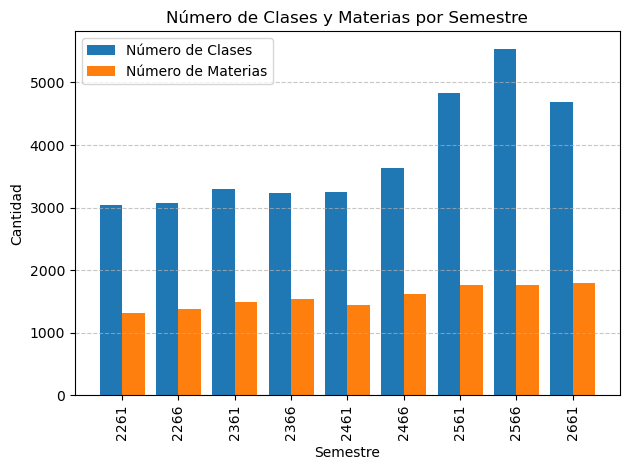

In [95]:
clases_por_semestre = programacion.groupby("Ciclo")["Número de Clase"].nunique()
materias_por_semestre = programacion.groupby("Ciclo")["Código Catalogo"].nunique()
#semestres = clases_por_semestre.index
x = np.arange(len(semestres))   # posiciones base
width = 0.4    

# Barras
barras_clases = plt.bar(
    x - width/2,
    clases_por_semestre.values,
    width,
    label='Número de Clases'
)

barras_materias = plt.bar(
    x + width/2,
    materias_por_semestre.values,
    width,
    label='Número de Materias'
)

# Etiquetas
plt.title('Número de Clases y Materias por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Cantidad')
plt.xticks(x, semestres, rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()